In [ ]:
try:
  import shap
except:
  !pip install shap
  import shap
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [2]:
data= load_iris()

In [3]:
#extract feature data
features = data.data.T
sepal_length,sepal_width=features[0],features[1]
petal_length,petal_width=features[2],features[3]

In [4]:
#extract feature names
sepal_length_label =data.feature_names[0]
sepal_width_label =data.feature_names[1]
petal_length_label =data.feature_names[2]
petal_width_label =data.feature_names[3]

In [5]:
names=[sepal_length_label,sepal_width_label,petal_length_label,petal_width_label]
class_names= data.target_names

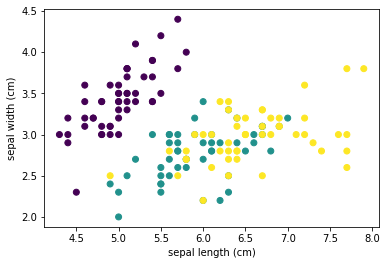

In [6]:
#how these relate with respect that particular target
plt.scatter(sepal_length,sepal_width,c=data.target)
plt.xlabel(sepal_length_label)
plt.ylabel(sepal_width_label)
plt.show()

In [7]:
X_train, X_test, y_train,y_test =train_test_split(data['data'],data['target'], random_state=0)


knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

Using 112 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


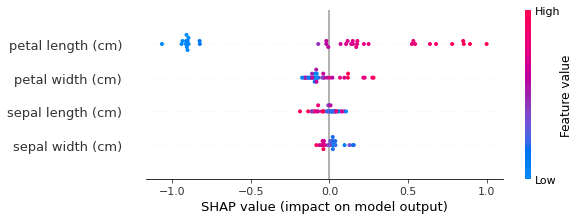

In [8]:
#Explanations
#Global Feature importance graph
knn_explainer = shap.KernelExplainer(knn.predict,X_train)
knn_shap_values = knn_explainer.shap_values(X_test)
shap.initjs()
shap.summary_plot(knn_shap_values, X_test,feature_names=names)

In [9]:
from sklearn.metrics import accuracy_score
predictions=knn.predict(X_test)

print('Accuracy : {:.2f}%'.format(accuracy_score(y_test, predictions)*100))

Accuracy : 97.37%


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[6.3 3.3 6.  2.5]
Real Class: virginica


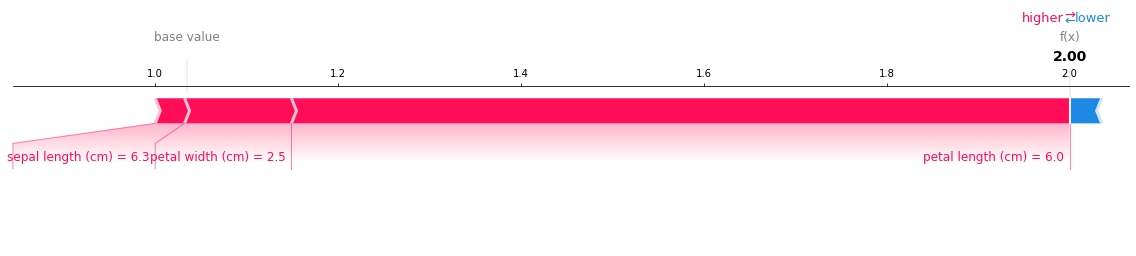

Prediction:  virginica


In [10]:
idx=5
print(names)
print(X_test[idx])
print('Real Class:', class_names[y_test[idx]])
shap.force_plot(knn_explainer.expected_value, knn_shap_values[idx], X_test[idx],matplotlib=True,feature_names=names)
print('Prediction: ', class_names[np.argmax(knn.predict_proba(X_test[idx].reshape(1, -1)))])

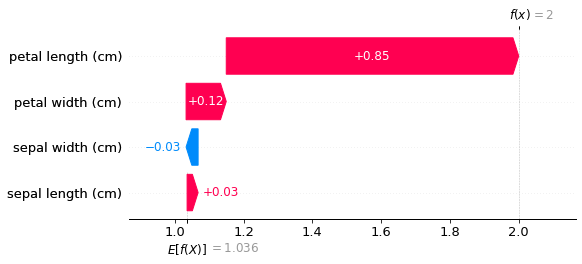

In [11]:
# Different way to represent the above explanation
shap.plots._waterfall.waterfall_legacy(knn_explainer.expected_value, knn_shap_values[idx],feature_names=names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[6.8 2.8 4.8 1.4]
Real Class: versicolor


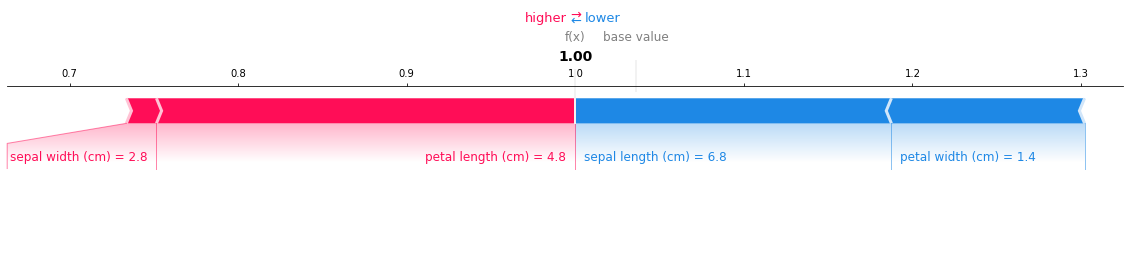

Prediction:  versicolor


In [12]:
idx=8
print(names)
print(X_test[idx])
print('Real Class:', class_names[y_test[idx]])
shap.force_plot(knn_explainer.expected_value, knn_shap_values[idx], X_test[idx],matplotlib=True,feature_names=names)
print('Prediction: ', class_names[np.argmax(knn.predict_proba(X_test[idx].reshape(1, -1)))])

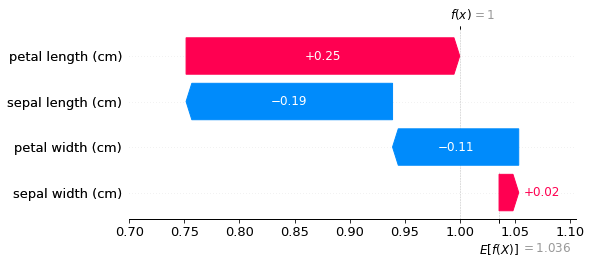

In [13]:
# Different way to represent the above explanation
shap.plots._waterfall.waterfall_legacy(knn_explainer.expected_value, knn_shap_values[8],feature_names=names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[5.4 3.9 1.3 0.4]
Real Class: setosa


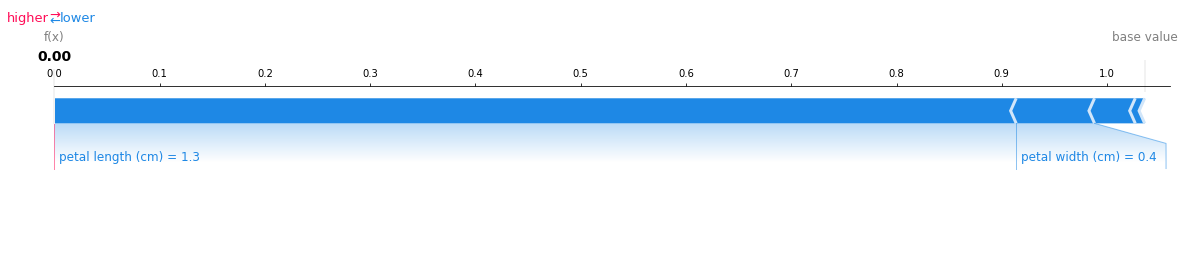

Prediction:  setosa


In [14]:
idx=19
print(names)
print(X_test[idx])
print('Real Class:', class_names[y_test[idx]])
shap.force_plot(knn_explainer.expected_value, knn_shap_values[idx], X_test[idx],matplotlib=True,feature_names=names)
print('Prediction: ', class_names[np.argmax(knn.predict_proba(X_test[idx].reshape(1, -1)))])

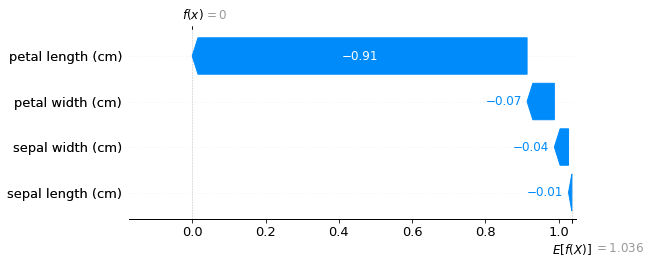

In [15]:
# Different way to represent the above explanation
shap.plots._waterfall.waterfall_legacy(knn_explainer.expected_value, knn_shap_values[19],feature_names=names)